# Handwritten digits regonision

In [46]:
import os
import sys
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from IPython.display import clear_output
import time

"""
def read_labels(path):
    in_file = open(path, 'rb')
    magic, size = struct.unpack('>II', in_file.read(8))
    labels = []
    byte = in_file.read(1)
    while byte:
        labels.append(byte[0])
        byte = in_file.read(1)
    in_file.close()
    return labels
"""

def read_labels(path):
    with open(path,'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        return data

def read_images(path):
    with open(path,'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        data = data.reshape((size, nrows, ncols))
        return data

# Prepering the data

In [47]:
train_labels = read_labels('train_labels.idx1-ubyte')
train_images = read_images('train_images.idx3-ubyte')

test_labels = read_labels('test_labels.idx1-ubyte')
test_images = read_images('test_images.idx3-ubyte')

train_images = train_images / 255.0
test_images = test_images / 255.0

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


9


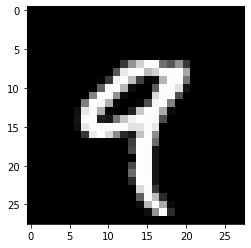

In [49]:
print(train_labels[4])
plt.imshow(train_images[4,:,:], cmap='gray')
plt.show()

# Creating and training the model

In [28]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, 'softmax')])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [39]:
with open('train_labels.idx1-ubyte','rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        data = f.read(20)
        print(data)

b'\x05\x00\x04\x01\t\x02\x01\x03\x01\x04\x03\x05\x03\x06\x01\x07\x02\x08\x06\t'


In [50]:
# Training the model
model.fit(train_images, train_labels, epochs=1, use_multiprocessing=True)

1875/1875 [==============================] - 1s 571us/step - loss: 0.2666 - accuracy: 0.9241


# Evaluation

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test acuracy:', test_acc)

313/313 [==============================] - 0s 408us/step - loss: 0.1368 - accuracy: 0.9589
Test acuracy: 0.958899974822998


2


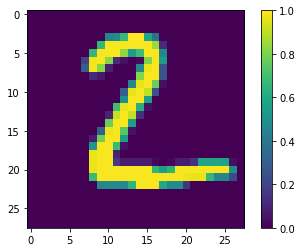

In [52]:
predicitions = model.predict(test_images)
print(np.argmax(predicitions[1]))
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
plt.ion()
for i in range(test_images.shape[0]):
    print(np.argmax(predicitions[i]))
    plt.figure()
    plt.imshow(test_images[i])
    plt.show()
    time.sleep(2)
    clear_output()
    plt.close()